# Introducción al análisis de texto con Python

Introducción al Análisis de Texto con Python aprenderemos los conceptos básicos del análisis de texto:

- texto de análisis
- analizar el texto

Primero usaremos nuestra propia herramienta de análisis hecha en casa, luego usaremos una biblioteca de python llamada `TextBlob` para usar algunas herramientas de análisis integradas.


## ¡Scrabble!

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Scrabble_game_in_progress.jpg" ancho =500x>

Scrabble es un juego popular en el que los jugadores intentan sumar puntos deletreando palabras y colocándolas en el tablero de juego. Usaremos Scrabble para calificar nuestro primer intento de análisis de texto. Esto demostrará los conceptos básicos de cómo funciona el análisis de texto.

La siguiente función te da la puntuación de Scrabble de cualquier palabra que le des.

In [1]:
# Esta función devolverá la puntuación de Scrabble de una palabra

def scrabble_score(texto):
    
   #Diccionario de nuestras puntuaciones de scrabble
    puntuacion = {
        "a": 1,
        "b": 3,
        "c": 3,
        "d": 2,
        "e": 1,
        "f": 4,
        "g": 2,
        "h": 4,
        "i": 1,
        "j": 8,
        "k": 5,
        "l": 1,
        "m": 3,
        "n": 1,
        "o": 1,
        "p": 3,
        "q": 10,
        "r": 1,
        "s": 1,
        "t": 1,
        "u": 1,
        "v": 4,
        "w": 4,
        "x": 8,
        "y": 4,
        "z": 10,
        "\n": 0, #en caso de que un nuevo carácter de línea salte aquí
        " ":0 #normalmente las palabras sueltas no tienen espacios pero pondremos esto aquí por si acaso        
    }
    
    total_score = 0
    
    #Buscamos cada letra en el diccionario de puntuación y la sumamos a un total acumulado
    #para acortar nuestro diccionario, solo estamos usando letras minúsculas, por lo que debemos
    #cambiar toda nuestra entrada a minúsculas con .lower()
    for letra in texto:
        total_score = total_score + puntuacion[letra.lower()]
    
    return total_score

El análisis de texto es un proceso que consta de tres pasos básicos:
1. Identificar el texto  que le gustaría analizar
1. Aplica el análisis a tu texto preparado
1. Revisa los resultados

En nuestro ejemplo muy básico de Scrabble, solo estamos interesados ​​en encontrar los puntos que obtendríamos por deletrear una palabra específica.

En un ejemplo más complejo con un texto más grande, puede realizar cualquiera de los siguientes tipos de análisis:
- determinar el sentimiento (tono positivo/negativo) del texto
- cuantificar la complejidad de una pieza de escritura en función del vocabulario que utiliza
- determinar qué temas están en su corpus
- clasifique su texto en diferentes categorías en función de lo que trata

Por supuesto, hay muchos otros resultados diferentes que puede obtener al realizar un análisis de texto.

## Q1

Puntúe su nombre creando la variable de texto `name` en la línea 1.

¿Cuántos puntos obtienes por tu nombre? Complete la siguiente expresión para averiguar el puntaje de scrabble de su nombre

In [2]:
name = "Eduardo"
print("La puntuación de mi nombre es:", scrabble_score(name))

La puntuación de mi nombre es: 9


Califique el nombre de su mascota (o personaje favorito de una historia) creando la variable de texto `nombre_mascota` en la línea 1.
¿Tu nombre o el nombre de tu mascota tiene una puntuación más alta en Scrabble?

In [3]:
nombre_mascota = "Lila"
print("La puntuación del nombre de mi mascota es:",scrabble_score(nombre_mascota))

#¡Compara para ver cuál obtiene más puntos!
if scrabble_score(nombre_mascota) > scrabble_score(name):
    print("¡El nombre de mi mascota gana más puntos!")
else:
    print("Mi nombre obtiene más o igual cantidad de puntos que el nombre de mi mascota")

La puntuación del nombre de mi mascota es: 4
Mi nombre obtiene más o igual cantidad de puntos que el nombre de mi mascota


# Mas allá de lo básico

Acabamos de completar un análisis de texto muy básico en el que analizamos dos fragmentos de texto diferentes para ver cuál obtiene una puntuación más alta en Scrabble. Expandamos esta idea a un ejemplo más complejo usando la biblioteca de Python [TextBlob](https://textblob.readthedocs.io/en/dev/). Hay otras bibliotecas más complejas que puede usar para el análisis de texto, estamos usando soluciones más simples para que podamos pasar más tiempo mirando los resultados en comparación con la configuración del código.

# Instalación y carga de las bibliotecas

La siguiente celda instalará y cargará las bibliotecas requeridas que realizarán el análisis de texto.
Documentacion [NLTK](https://www.nltk.org/data.html)  es una plataforma líder para crear programas de Python para trabajar con datos de lenguaje humano.

In [4]:

%pip install textblob


from textblob import TextBlob

import pandas as pd
import nltk
from nltk.corpus import stopwords
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')


#Let's make sure our previews show more information
pd.set_option('display.max_colwidth', 999)

#Classifier for laster 
from textblob.classifiers import NaiveBayesClassifier
from textblob import Word

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


# Texto

![winnie_splash](https://raw.githubusercontent.com/BrockDSL/Text_Analysis_with_Python/master/winnie_splash.png)

Corpus es una forma elegante de decir el texto que vamos a ver. Limpiar un corpus y prepararlo para el análisis es una gran parte del proceso, una vez hecho esto, el resto es fácil. Para nuestro ejemplo, vamos a ver algunas entradas del [diario](https://dr.library.brocku.ca/handle/10464/7282) de Winnie Beam. La siguiente celda cargará este corpus en un marco de datos de Pandas y nos mostrará algunos enteros.

In [44]:
winnie_corpus = pd.read_csv('winnie_corpus.txt', header = None, delimiter="\t")
winnie_corpus.columns = ["Pagina","Dia","Texto"]
winnie_corpus['Dia'] = pd.to_datetime(winnie_corpus['Dia'])
winnie_corpus['Texto'] = winnie_corpus.Texto.astype(str)

#vista previa de nuestras entradas principales
winnie_corpus.head()

,Pagina,Dia,Texto
0,7,1900-01-01,"New Year. First day of 1900 Charlie Merritt died at Grand Forks British Columbia yesterday of typhoid fever. To-day is election day and pap went up about 3 o'clock and did not get back until nearly 10. He brought us some candy chocolate drops. We had a very fat goose for dinner, not a very young one. Had to have good teeth."
1,7,1900-01-02,"Went uptown in afternoon. Was up to Eckardt's but Miss Macfarlane was not there so I did not get what I wanted. Called at office and Nettie came home with me for tea. Mr Carman came over and borrowed my Mildred books. Then Leta came & borrowed my German Grammar as she forgot hers & left it at school before holiday. Papa, mamma, Nettie & I played crokinole. Mamma & I beat. The 2nd Contingent left for Toronto today to go to South Africa. Dr King's som went."
2,8,1900-01-03,"Mrs Trusty was here washing School started to-day, but I was not going this week. Mamma went to the church and then to Mrs Chatfields Took her the church books. The queen Street Baptist church had a service of praise this evening. Mrs Chapman is organist & Mrs Read-Muir sang Mrs George Armstrong has a daughter was born on New Year's day."
3,8,1900-01-04,"Went over to Carman's to have Ella go with me to Dunn's greenhouse. We went about half past three. I brought a primrose Miss Chaplin was in there. Mamma went to Mrs Klotz at home Beatrice helped. Papa & I went to Sunday School entertainment at night. Had a very long programme. There was a dialogue called ""Aunt Ketty's shopping which was good, and a shaving scene. Mr perry gave a tableful of prizes away. Beatrice came home with us. They had a drill of girls & they sang ""Soldiers of the Queen"""
4,9,1900-01-05,"Sweep day. I read ""At the Camerons"" in the ""Harper's Young People"" when mamma was sweeping. We had a beggar in afternoon asking for a few cents as he had a long way to go. Rats! Went over to Lee's in afternoon after eggs. Took a ""Young Ladies Journal"" Mrs Pay lent me. Her kitty has a sore tail. Mrs Malcolmson came after eggs when I was there. She got large sum of 2. Had some candy at night."



# Midiendo el Sentimiento

Podemos analizar el `sentimiento`del texto (más [detalles](https://planspace.org/20150607-textblob_sentiment/).), Las frases para ver realmente un buen funcionamiento tienen que estar en Ingles,la siguiente celda demuestra esto:

In [45]:
feliz_sentence = "Python is the best programming language ever!"
triste_sentence = "Python is difficult to use, and very frustrating"


print("Sentimiento de frase feliz ", TextBlob(feliz_sentence).sentiment)
print("Sentimiento de triste frase ", TextBlob(triste_sentence).sentiment)

# polarity oscila entre -1 y 1.
# la subjectvity va de 0 a 1.


Sentimiento de frase feliz  Sentiment(polarity=1.0, subjectivity=0.3)
Sentimiento de triste frase  Sentiment(polarity=-0.51, subjectivity=1.0)


Probamos con un par de oraciones diferentes en la celda de código a continuación. Vea si puede crear algo que puntúe -1 y otro que puntúe 1 para _polaridad_. Vea si puede minimizar la _subjetividad_ de su oración. 

(Podemos crear una cadena de texto de varias líneas poniéndola entre comillas triples como la siguiente celda).

In [46]:
Prueba_texto = """
>I'm tired of covid, I didn't like to catch it
"""
print("La puntuación de la oración de prueba es ", TextBlob(Prueba_texto).sentiment)

La puntuación de la oración de prueba es  Sentiment(polarity=-0.4, subjectivity=0.7)


Agregar sentimiento a las entradas de nuestro diario

La siguiente celda anotará cada entrada del diario en una nueva columna que se agregará al marco de datos. Recorremos cada entrada, calculamos las dos puntuaciones que representan el sentimiento. Después de calcular todos los puntajes, agréguelos al marco de datos.

In [48]:
#Aplicar análisis de sentimiento de TextBlob

polarity = []
subjectivity = []


for day in winnie_corpus.Texto:
    score = TextBlob(day)
    polarity.append(score.sentiment.polarity)
    subjectivity.append(score.sentiment.subjectivity)
    
winnie_corpus['polarity'] = polarity
winnie_corpus['subjectivity'] = subjectivity

winnie_corpus.head()

,Pagina,Dia,Texto,polarity,subjectivity
0,7,1900-01-01,"New Year. First day of 1900 Charlie Merritt died at Grand Forks British Columbia yesterday of typhoid fever. To-day is election day and pap went up about 3 o'clock and did not get back until nearly 10. He brought us some candy chocolate drops. We had a very fat goose for dinner, not a very young one. Had to have good teeth.",0.205322,0.377286
1,7,1900-01-02,"Went uptown in afternoon. Was up to Eckardt's but Miss Macfarlane was not there so I did not get what I wanted. Called at office and Nettie came home with me for tea. Mr Carman came over and borrowed my Mildred books. Then Leta came & borrowed my German Grammar as she forgot hers & left it at school before holiday. Papa, mamma, Nettie & I played crokinole. Mamma & I beat. The 2nd Contingent left for Toronto today to go to South Africa. Dr King's som went.",-0.020000,0.120000
2,8,1900-01-03,"Mrs Trusty was here washing School started to-day, but I was not going this week. Mamma went to the church and then to Mrs Chatfields Took her the church books. The queen Street Baptist church had a service of praise this evening. Mrs Chapman is organist & Mrs Read-Muir sang Mrs George Armstrong has a daughter was born on New Year's day.",0.136364,0.454545
3,8,1900-01-04,"Went over to Carman's to have Ella go with me to Dunn's greenhouse. We went about half past three. I brought a primrose Miss Chaplin was in there. Mamma went to Mrs Klotz at home Beatrice helped. Papa & I went to Sunday School entertainment at night. Had a very long programme. There was a dialogue called ""Aunt Ketty's shopping which was good, and a shaving scene. Mr perry gave a tableful of prizes away. Beatrice came home with us. They had a drill of girls & they sang ""Soldiers of the Queen""",0.054583,0.384167
4,9,1900-01-05,"Sweep day. I read ""At the Camerons"" in the ""Harper's Young People"" when mamma was sweeping. We had a beggar in afternoon asking for a few cents as he had a long way to go. Rats! Went over to Lee's in afternoon after eggs. Took a ""Young Ladies Journal"" Mrs Pay lent me. Her kitty has a sore tail. Mrs Malcolmson came after eggs when I was there. She got large sum of 2. Had some candy at night.",0.030357,0.345714


Ahora que tenemos valores de sentimiento diarios, intentemos visualizar cómo suben y bajan en el transcurso de los primeros 3 meses del año.

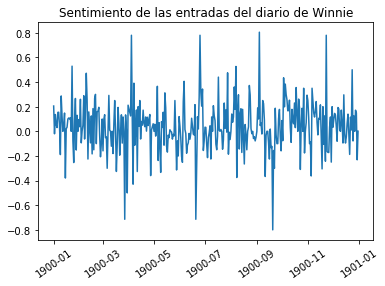

In [56]:
#Hagamos un gráfico del sentimiento a medida que cambia día a día.

plt.plot(winnie_corpus["Dia"],winnie_corpus["polarity"])
plt.xticks(rotation='35')
plt.title("Sentimiento de las entradas del diario de Winnie")
plt.show()


## Picos interesantes?

Vemos algunos picos negativos y positivos realmente fuertes en el sentimiento. Echemos un vistazo a algunas de esas entradas. Ejecute las siguientes tres celdas para ver las entradas negativas y positivas individuales.

In [57]:
#en lugar de mirar solo el valor más alto y el más bajo, reduciremos ese número en un valor de umbral
#así podemos ver números que están cerca del sentimiento más alto y del sentimiento más bajo
#empezaremos con el 20%.

threshold = 0.2

In [62]:
#Muy negativo
sentimiento_malo = winnie_corpus["polarity"].min()

#Reducir este número por umbral %
sentimiento_malo = sentimiento_malo - (sentimiento_malo * threshold)

winnie_corpus[winnie_corpus["polarity"] <= sentimiento_malo]

,Pagina,Dia,Texto,polarity,subjectivity
85,49,1900-03-27,Mamma was out collecting in afternoon at Mrs Coy's Mrs Smith's Mrs Reynold's Mrs Pay is sick with grippe and he has been sick. Mrs Varley called on mamma. Papa and Sid went to the Falls again to-night. They me after Mr Herbert (Irrigation) Beatty. Sid came and staid here all night. They got home about 1 o'clock.,-0.714286,0.857143
168,92,1900-06-20,"Wash day. Mrs. Trusty has been sick and Dr. Jory tells her it is paralysis coming on. In the afternoon I practiced & worked at my Harmony until I did not know whether I was on my head or heels. Mamma went uptown, and to the church. She went to pay Mrs. Sullivans for my dress.",-0.714286,0.857143
260,138,1900-09-20,"Nasty gloomy day. Mr McSloy sent papa five trout from Quebec. Had them Tuesday night. They tried to stop the ringing of the 6, 2, 5, & 6 bells. Crazy.",-0.800000,0.950000


In [65]:
#Muy positivo
sentimiento_positivo = winnie_corpus["polarity"].max()

#Reducir este número por umbral %
sentimiento_positivo = sentimiento_positivo - (sentimiento_positivo * threshold)

winnie_corpus[winnie_corpus["polarity"] >= sentimiento_positivo]

,Pagina,Dia,Texto,polarity,subjectivity
91,53,1900-04-04,"I sent for some pictures on Friday from Beverly, Mass and they came to-day, but they sent them to the customs, and charged 5 cents Mamma went to the church to auxiliary. Then I went to the service. Mr. Perry spoke on 1 Peter 1.4 verse. The Bishop staid at Merritt's and conducted the Lenten service in St. George's Church yesterday afternoon. Papa brought the pictures home. They are very nice. There are a lot of them on the ""Life of Christ"". Dr & Mrs Klots were here in the evening. They played King Pedro",0.780,1.00
173,94,1900-06-25,"Mamma went out collecting in afternoon. Very warm. In the evening papa caught the pigeons and Mr. Coy and he went to race course & shot them. Dr. Kilmer & Mr. Lovelace did not turn up. Della mamma & I went for a drive. They had an undergraduate Music & Elecution recital to-night at Demill, Did not go. Went home with Dell & over to Dwyer's, Bessie Read was there. Got 12 pictures from Brown & Co. Mr Painter gave papa four snapping turtle eggs on Saturday",0.780,0.78
244,130,1900-09-04,"Was reading ""Three men on Wheels"" when Mrs Tulley and Dr Abbott came in. They wanted papa, mamma & I to go to the Welland House for tea. Dr Abbott hurried up to the office and caught papa. Had a very good supper. They walked home with us. Mrs Tulley told about a good books ""Uarda"" by Ebeer.",0.805,0.69
324,170,1900-11-23,"This morning I went uptown after my pins and to change my library book. Got ""Leofwine the Monk"". Very nice day. Mamma went uptown in the afternoon. McLaren's and Anderson's have their Christmas things in. The Collegiate Cadets have a concert to-night. Miss Murray is to sing, Miss McCallum recite and the flag is to be presented to the cadets.",0.780,1.00
